In [1]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%R
library(readr)
library(dplyr)

trump_df <- read_csv("./data/realdonaldtrump.csv")
colnames(trump_df)

[1] "favorite_count"          "source"                 
[3] "text"                    "in_reply_to_screen_name"
[5] "is_retweet"              "created_at"             
[7] "retweet_count"           "id_str"                 


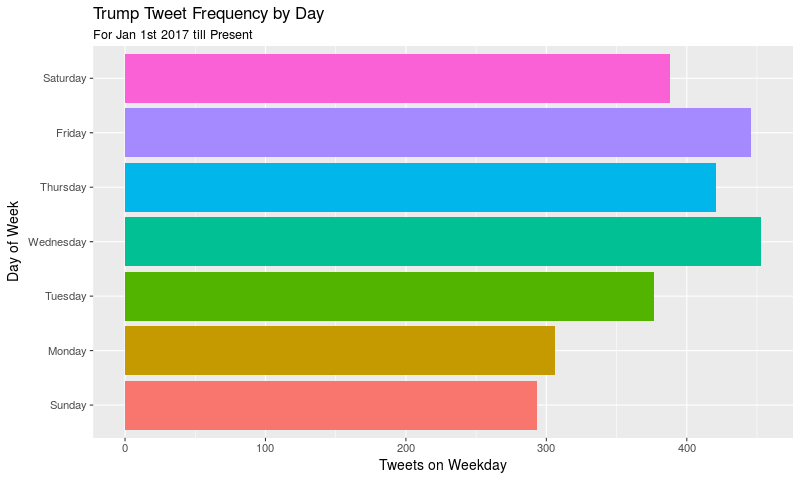

In [3]:
%%R -w 800
library(ggplot2)
theme_set(theme_gray(base_size = 14))
trump_df$created_at <- gsub(" +0000", "", trump_df$created_at, fixed=T)
created_at <- as.POSIXlt(trump_df$created_at, "EST",  format="%a %b %d %H:%M:%S %Y")

created_at_day <- as.integer(created_at$wday)
tweet_day <- data.frame(t(table(created_at_day))) %>%
    select(created_at_day, Freq) %>%
    mutate(day=factor(created_at_day, levels=0:6, labels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")))



ggplot(tweet_day, aes(x=day, y=Freq, fill=day)) + geom_bar(stat="identity") + theme(legend.position="") +
    coord_flip() + labs(title="Trump Tweet Frequency by Day", subtitle="For Jan 1st 2017 till Present", x="Day of Week", y="Tweets on Weekday")

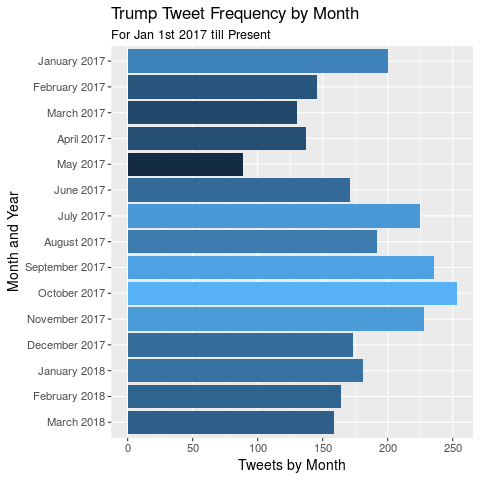

In [4]:
%%R

created_at_mon <- created_at$mon
created_at_year <- created_at$year

trump_df$month <- factor(created_at_mon, levels=0:11, labels = c("January","February","March","April","May","June","July","August","September","October","November","December"))
trump_df$year <- factor(created_at_year, levels=117:118, labels=c("2017","2018"))

tweet_month_year <- trump_df %>%
    group_by(month, year) %>%
    summarize(count=n()) %>%
    mutate(monthyear = factor(paste(month, year), levels=c("January 2017","February 2017","March 2017","April 2017","May 2017","June 2017",
                                                         "July 2017","August 2017", "September 2017","October 2017", "November 2017", "December 2017",
                                                         "January 2018", "February 2018", "March 2018"))) %>%
    mutate(monthyear = factor(monthyear, levels = rev(levels(monthyear)))) %>%
    select(monthyear, count)
    
tweet_month_year[order(as.Date(tweet_month_year$monthyear, format="%Y %B")),]


ggplot(tweet_month_year, aes(x=monthyear, y=count, fill=count)) + geom_bar(stat="identity") + theme(legend.position="") +
    coord_flip() + labs(title="Trump Tweet Frequency by Month", subtitle="For Jan 1st 2017 till Present", x="Month and Year", y="Tweets by Month") 

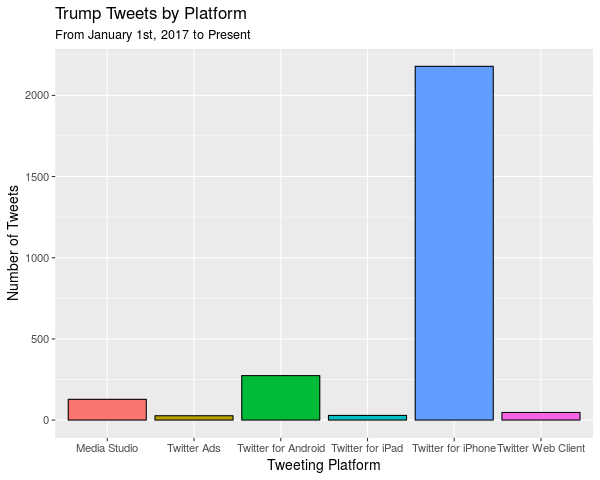

In [5]:
%%R -w 600

ggplot(trump_df, aes(x=source, fill=source)) + geom_bar(color="black") + theme(legend.position="") +
    labs(title="Trump Tweets by Platform", subtitle="From January 1st, 2017 to Present", 
         x="Tweeting Platform", y="Number of Tweets")

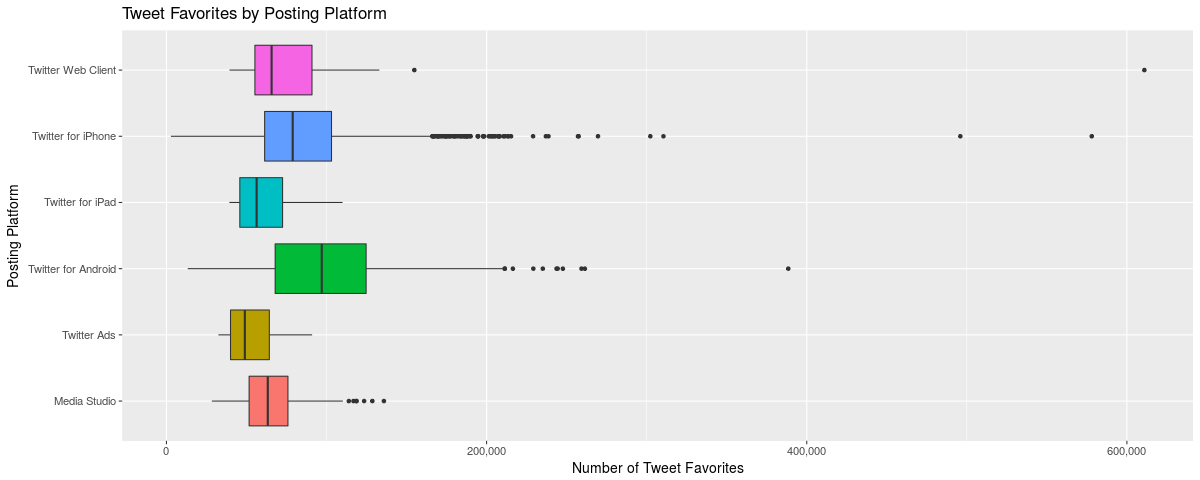

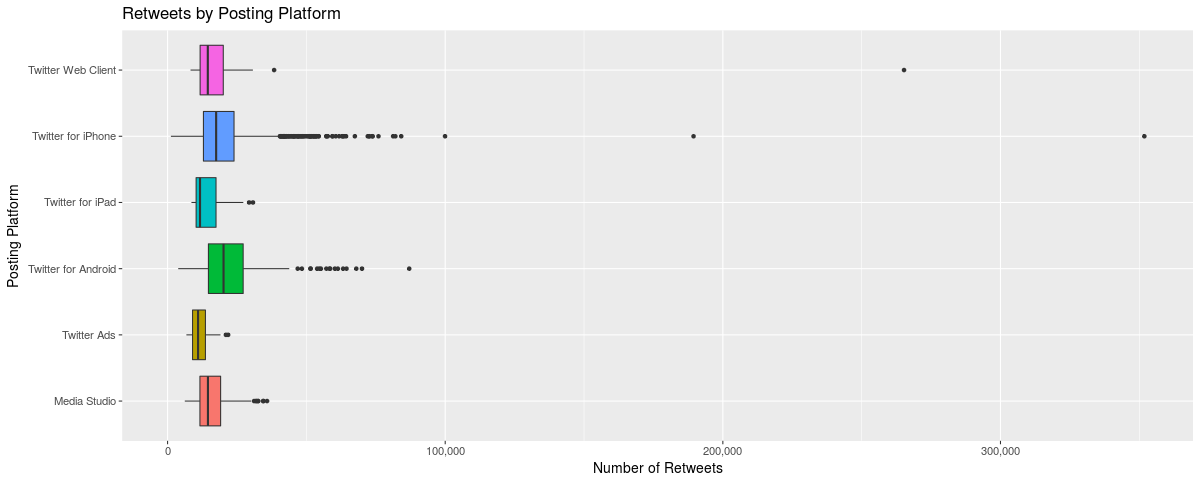

In [6]:
%%R -w 1200

print(ggplot(trump_df, aes(y=favorite_count, x=source, fill=source)) + geom_boxplot() + coord_flip() +
    theme(legend.position="") + 
    labs(x="Posting Platform", y="Number of Tweet Favorites", title="Tweet Favorites by Posting Platform") +
    scale_y_continuous(labels=scales::comma))

print(ggplot(trump_df, aes(y=retweet_count, x=source, fill=source)) + geom_boxplot() + coord_flip() +
    theme(legend.position="") + 
    labs(x="Posting Platform", y="Number of Retweets", title="Retweets by Posting Platform") +
    scale_y_continuous(labels=scales::comma))


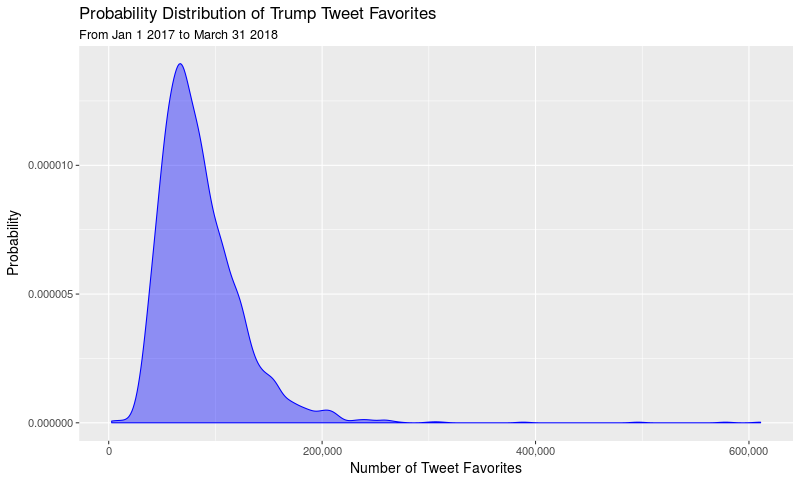

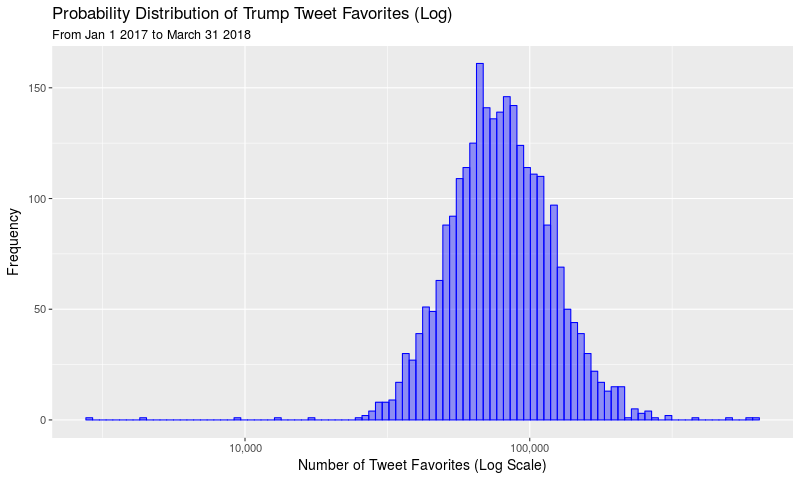

In [7]:
%%R -w 800

smoothed_fav_freq <- trump_df %>%
    mutate(favorite_count = round(favorite_count/1000, digits=0)*1000) %>%
    group_by(favorite_count) %>%
    summarize(count=n())
    
print(ggplot(trump_df, aes(x=favorite_count, fill=I('blue'), color=I('blue'))) + geom_density(alpha=0.4) +
    scale_x_continuous(labels = scales::comma) + scale_y_continuous(labels = scales::comma) +
    labs(title="Probability Distribution of Trump Tweet Favorites", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Tweet Favorites", y="Probability"))
    
# We can see from this second plot that his likes seem to follow a 'log-normal' distribution
ggplot(trump_df, aes(x=favorite_count, color=I('blue'), fill=I('blue'))) + geom_histogram(bins=100, alpha=0.4)  + scale_x_log10(labels= scales::comma) +
     labs(title="Probability Distribution of Trump Tweet Favorites (Log)", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Tweet Favorites (Log Scale)", y="Frequency")

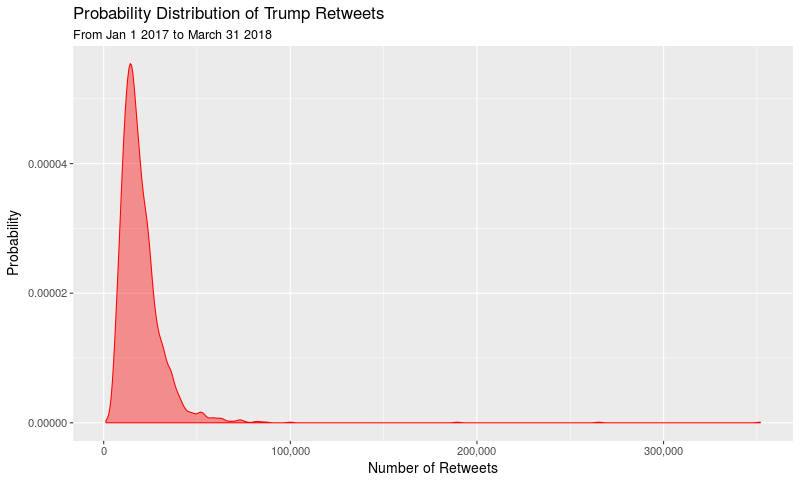

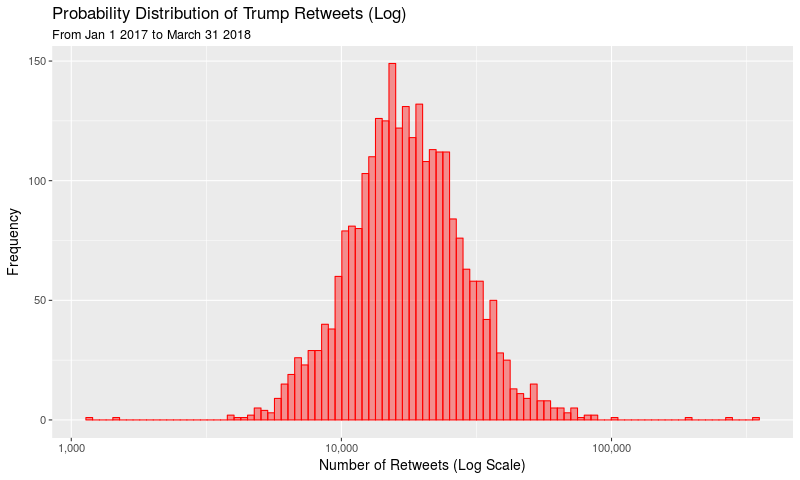

In [8]:
%%R -w 800

print(ggplot(trump_df, aes(x=retweet_count, fill=I('red'), color=I('red'))) + geom_density(alpha=0.4) +
    scale_x_continuous(labels = scales::comma) + scale_y_continuous(labels = scales::comma) +
    labs(title="Probability Distribution of Trump Retweets", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Retweets", y="Probability"))
    
# We can see from this second plot that his likes seem to follow a 'log-normal' distribution
ggplot(trump_df, aes(x=retweet_count, color=I('red'), fill=I('red'))) + geom_histogram(bins=100, alpha=0.4)  + scale_x_log10(labels= scales::comma) +
     labs(title="Probability Distribution of Trump Retweets (Log)", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Retweets (Log Scale)", y="Frequency")

In [9]:
%%R -o trump_df_show

trump_df <- trump_df %>%
    arrange(desc(favorite_count))

trump_df_show <- trump_df %>%
    select(favorite_count, retweet_count, text, created_at)

# Find out good way to graph these

In [10]:
import pandas as pd
from rpy2.robjects import pandas2ri
pandas2ri.activate()
pd.set_option('display.width', 1000)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)
pandas2ri.activate()

pandas2ri.ri2py(trump_df_show)[1:20]

,favorite_count,retweet_count,text,created_at
1,578039,351822,#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg,Sun Jul 02 13:21:42 2017
2,495946,189455,North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0,Wed Jan 03 00:49:19 2018
3,388457,87033,"Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views.",Sun Jan 22 14:23:17 2017
4,310478,72592,My warmest condolences and sympathies to the victims and families of the terrible Las Vegas shooting. God bless you!,Mon Oct 02 11:11:37 2017
5,302283,99932,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they… https://t.co/TuiaWGtnbR",Mon Jan 01 12:12:00 2018
6,269594,73862,"Now that the three basketball players are out of China and saved from years in jail, LaVar Ball, the father of LiAn… https://t.co/371qJ1biwh",Sun Nov 19 17:42:36 2017
7,261395,67967,It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!,Fri Jan 20 12:31:53 2017
8,259269,70029,"What an amazing comeback and win by the Patriots. Tom Brady, Bob Kraft and Coach B are total winners. Wow!",Mon Feb 06 03:36:54 2017
9,257518,75967,"Crazy Joe Biden is trying to act like a tough guy. Actually, he is weak, both mentally and physically, and yet he t… https://t.co/4e33ZxnAw7",Thu Mar 22 10:19:57 2018
10,257102,62865,"Whatever the United States can do to help out in London and the U. K., we will be there - WE ARE WITH YOU. GOD BLESS!",Sat Jun 03 23:24:45 2017


Thought: Maybe plot all those graphs on the same axis

Also: Average tweet favorites by weekday, month year

## Basic Fox News Tweet Analysis



In [11]:
%%R
fox_janfeb17 <- read_csv("./data/foxnewsJanFeb.csv")
fox_marapr17 <- read_csv("./data/foxnews_MarApr.csv")
fox_mayjune17 <- read_csv("./data/foxnews_MayJune.csv")

fox_s1_17 <- data.frame(rbind(fox_janfeb17, fox_marapr17, fox_mayjune17)) %>%
    arrange(desc(favorite_count)) %>%
    select(favorite_count, retweet_count, text, created_at)

# What does the Fox S1 2017 data look like
glimpse(fox_s1_17)

# What are the dimensions of the data?
dim(fox_s1_17)

Observations: 27,636
Variables: 4
$ favorite_count <int> 39539, 33214, 31629, 29087, 28371, 27506, 27139, 262...
$ retweet_count  <int> 9470, 8437, 8556, 7348, 15925, 12717, 7690, 10475, 6...
$ text           <chr> ".@POTUS: \"I'm not against the media. I'm against t...
$ created_at     <chr> "Sat May 06 15:31:10 +0000 2017", "Sun Jun 18 16:06:...
[1] 27636     4


In [12]:
%%R -o fox_s1_17 -o fox_17_potus
fox_17_potus <- fox_s1_17 %>%
    filter( grepl("@POTUS", text) | grepl("@realDonaldTrump", text)) %>%
    select(favorite_count, retweet_count, text, created_at) %>%
    arrange(desc(favorite_count))

In [13]:
from rpy2.robjects import pandas2ri



In [14]:
fox_s1_17[1:10]

,favorite_count,retweet_count,text,created_at
1,33214,8437,New Poll Shows @POTUS Approval at 50 Percent\nhttps://t.co/FRWlSVvxzQ,Sun Jun 18 16:06:49 +0000 2017
2,31629,8556,"Singer Joy Villa is facing backlash for wearing a Trump dress to the #Grammys, but her music sales have skyrocketed… https://t.co/IRbv09Ndx3",Mon Feb 13 18:45:29 +0000 2017
3,29087,7348,Jobs created in February. https://t.co/sOaMDxxTA8,Sun Mar 12 14:41:21 +0000 2017
4,28371,15925,"Moments ago, @POTUS issued this statement regarding his Executive Order concerning extreme vetting. https://t.co/wqHaI8jwa1",Sun Jan 29 21:42:12 +0000 2017
5,27506,12717,.@KellyannePolls: I didn't hear #MerylStreep use her platform to give a shoutout to the mentally challenged boy who… https://t.co/FouwWeUOOF,Mon Jan 09 12:27:39 +0000 2017
6,27139,7690,.@FLOTUS opens her remarks with the Lord's Prayer. https://t.co/z0Vk6znjL8,Sat Feb 18 22:49:07 +0000 2017
7,26261,10475,"FULL: @seanspicer: ""We're going to hold the press accountable."" https://t.co/nK51t16Kpf",Sat Jan 21 22:48:42 +0000 2017
8,26217,6009,".@POTUS: ""I want to take a moment to send our thoughts, love, and prayers to Congressman Steve Scalise and his enti… https://t.co/yhZfleIhf0",Thu Jun 15 23:53:29 +0000 2017
9,25875,4338,Singer Joy Villa wears Trump dress to the Grammys https://t.co/yz1li25g0N https://t.co/Lh4io74ij0,Mon Feb 13 11:18:07 +0000 2017


In [15]:
fox_s1_17[1:10].sort_values(by=['retweet_count'], ascending=False)

,favorite_count,retweet_count,text,created_at
4,28371,15925,"Moments ago, @POTUS issued this statement regarding his Executive Order concerning extreme vetting. https://t.co/wqHaI8jwa1",Sun Jan 29 21:42:12 +0000 2017
5,27506,12717,.@KellyannePolls: I didn't hear #MerylStreep use her platform to give a shoutout to the mentally challenged boy who… https://t.co/FouwWeUOOF,Mon Jan 09 12:27:39 +0000 2017
7,26261,10475,"FULL: @seanspicer: ""We're going to hold the press accountable."" https://t.co/nK51t16Kpf",Sat Jan 21 22:48:42 +0000 2017
2,31629,8556,"Singer Joy Villa is facing backlash for wearing a Trump dress to the #Grammys, but her music sales have skyrocketed… https://t.co/IRbv09Ndx3",Mon Feb 13 18:45:29 +0000 2017
1,33214,8437,New Poll Shows @POTUS Approval at 50 Percent\nhttps://t.co/FRWlSVvxzQ,Sun Jun 18 16:06:49 +0000 2017
6,27139,7690,.@FLOTUS opens her remarks with the Lord's Prayer. https://t.co/z0Vk6znjL8,Sat Feb 18 22:49:07 +0000 2017
3,29087,7348,Jobs created in February. https://t.co/sOaMDxxTA8,Sun Mar 12 14:41:21 +0000 2017
8,26217,6009,".@POTUS: ""I want to take a moment to send our thoughts, love, and prayers to Congressman Steve Scalise and his enti… https://t.co/yhZfleIhf0",Thu Jun 15 23:53:29 +0000 2017
9,25875,4338,Singer Joy Villa wears Trump dress to the Grammys https://t.co/yz1li25g0N https://t.co/Lh4io74ij0,Mon Feb 13 11:18:07 +0000 2017


In [16]:
fox_17_potus[1:10]

,favorite_count,retweet_count,text,created_at
1,33214,8437,New Poll Shows @POTUS Approval at 50 Percent\nhttps://t.co/FRWlSVvxzQ,Sun Jun 18 16:06:49 +0000 2017
2,28371,15925,"Moments ago, @POTUS issued this statement regarding his Executive Order concerning extreme vetting. https://t.co/wqHaI8jwa1",Sun Jan 29 21:42:12 +0000 2017
3,26217,6009,".@POTUS: ""I want to take a moment to send our thoughts, love, and prayers to Congressman Steve Scalise and his enti… https://t.co/yhZfleIhf0",Thu Jun 15 23:53:29 +0000 2017
4,24907,7049,MOMENTS AGO: @POTUS signs legislation undoing coal mining regulation. https://t.co/FeQzj4WAnk,Thu Feb 16 21:37:48 +0000 2017
5,23401,5615,Breaking News: @POTUS signs executive orders on finance regulations. https://t.co/cRHOquwccI,Fri Feb 03 18:31:04 +0000 2017
6,21944,12029,Poll: @POTUS's job approval. https://t.co/sekK2h1D9O,Fri Feb 17 16:02:14 +0000 2017
7,21918,7124,".@POTUS: No matter our beliefs, no matter our party, it's time for us to remember that we are all Americans, and we… https://t.co/y1O1Up5qpU",Thu Jun 22 01:18:51 +0000 2017
8,21575,11948,.@realDonaldTrump is sworn in as the 45th President of the United States. #Inauguration #Trump45 https://t.co/VwNWPWJaEN,Fri Jan 20 17:02:19 +0000 2017
9,19474,5971,WATCH: @realDonaldTrump surprises White House visitors as tours resume https://t.co/DSh2YKwRpr https://t.co/QsM7cmke5Q,Tue Mar 07 15:16:05 +0000 2017


In [17]:
fox_17_potus[1:10].sort_values(by=['retweet_count'], ascending=False)

,favorite_count,retweet_count,text,created_at
2,28371,15925,"Moments ago, @POTUS issued this statement regarding his Executive Order concerning extreme vetting. https://t.co/wqHaI8jwa1",Sun Jan 29 21:42:12 +0000 2017
6,21944,12029,Poll: @POTUS's job approval. https://t.co/sekK2h1D9O,Fri Feb 17 16:02:14 +0000 2017
8,21575,11948,.@realDonaldTrump is sworn in as the 45th President of the United States. #Inauguration #Trump45 https://t.co/VwNWPWJaEN,Fri Jan 20 17:02:19 +0000 2017
1,33214,8437,New Poll Shows @POTUS Approval at 50 Percent\nhttps://t.co/FRWlSVvxzQ,Sun Jun 18 16:06:49 +0000 2017
7,21918,7124,".@POTUS: No matter our beliefs, no matter our party, it's time for us to remember that we are all Americans, and we… https://t.co/y1O1Up5qpU",Thu Jun 22 01:18:51 +0000 2017
4,24907,7049,MOMENTS AGO: @POTUS signs legislation undoing coal mining regulation. https://t.co/FeQzj4WAnk,Thu Feb 16 21:37:48 +0000 2017
3,26217,6009,".@POTUS: ""I want to take a moment to send our thoughts, love, and prayers to Congressman Steve Scalise and his enti… https://t.co/yhZfleIhf0",Thu Jun 15 23:53:29 +0000 2017
9,19474,5971,WATCH: @realDonaldTrump surprises White House visitors as tours resume https://t.co/DSh2YKwRpr https://t.co/QsM7cmke5Q,Tue Mar 07 15:16:05 +0000 2017
5,23401,5615,Breaking News: @POTUS signs executive orders on finance regulations. https://t.co/cRHOquwccI,Fri Feb 03 18:31:04 +0000 2017


In [18]:
%%R -o fox_tweet_corpus

fox_tweet_corpus <- paste(fox_s1_17$text, collapse=' ')

**ALSO HERE:** Should sort things together like US, USA, United States, North Korea, White House, Fox News, Fake News

In [19]:
import re
from collections import Counter
fox_tweet_words = fox_tweet_corpus[0].split(" ")
fox_tweet_words = [word for word in fox_tweet_words if word.strip() != ""]
fox_tweet_words = [word for word in fox_tweet_words if not re.search("https?", word)]
fox_tweet_words = [re.sub('\\\\', "", word) for word in fox_tweet_words]
fox_tweet_words = [re.sub(":", "", word) for word in fox_tweet_words]
fox_tweet_words = [re.sub("\\.", "", word) for word in fox_tweet_words]
fox_tweet_words = [re.sub("\"", "", word) for word in fox_tweet_words]

filler_words = ['to','the','of','in','a','is','for','and','that','at','with','have','via','are','-','be','not','as','&amp;','this','you','has','was','will','from',
                'on','I','about','after','we','his','by','our','it','people','says','going','who','he','I','an','out','think','they','more','all','over','been',
                'what','do','say','new','no','up','get','very','want','but','can','would','first','their', 'into','don\'t', 'it\'s','or','had','now','than','need',
                'one','against','like','should','WATCH','Tune','so','if','just','time','back','were','your','make','take','via…','there',"|",'know','care','right','down',
                'some','being','really','her','when','any','“I','could', 'during']
for filler in filler_words:
    fox_tweet_words = [word for word in fox_tweet_words if word.lower() != filler.lower()]

exact_filler_words = ['us']
for filler in exact_filler_words:
    fox_tweet_words = [word for word in fox_tweet_words if word != filler]
    
word_occurrences = Counter(fox_tweet_words)
word_results = list(word_occurrences.items())
word_results.sort(key=lambda x: x[1], reverse=True)
word_results[0:50]

# Now, assuming that Fox only mentions the president by noun or handle once per tweet, we can add together a bunch of references
# (ie Trump, @realDonaldTrump, and Trump's should be equivalent, president and President should be equivalent)
word_occurrences['Trump'] += word_occurrences['@realDonaldTrump'] + word_occurrences['Trump\'s']
del word_occurrences['@realDonaldTrump']
del word_occurrences['Trump\'s']

word_occurrences['President'] += word_occurrences['president']
del word_occurrences['president']

word_occurrences['@POTUS'] += word_occurrences['@POTUS\'s']
del word_occurrences['@POTUS\'s']

word_results = list(word_occurrences.items())
word_results.sort(key=lambda x : x[1], reverse=True)


word, occurrences = zip(*word_results[0:50])
fox_word_df = pd.DataFrame({"word":word, "occurrences":occurrences})
fox_word_df = fox_word_df.sort_values(by=['occurrences'], ascending=False)

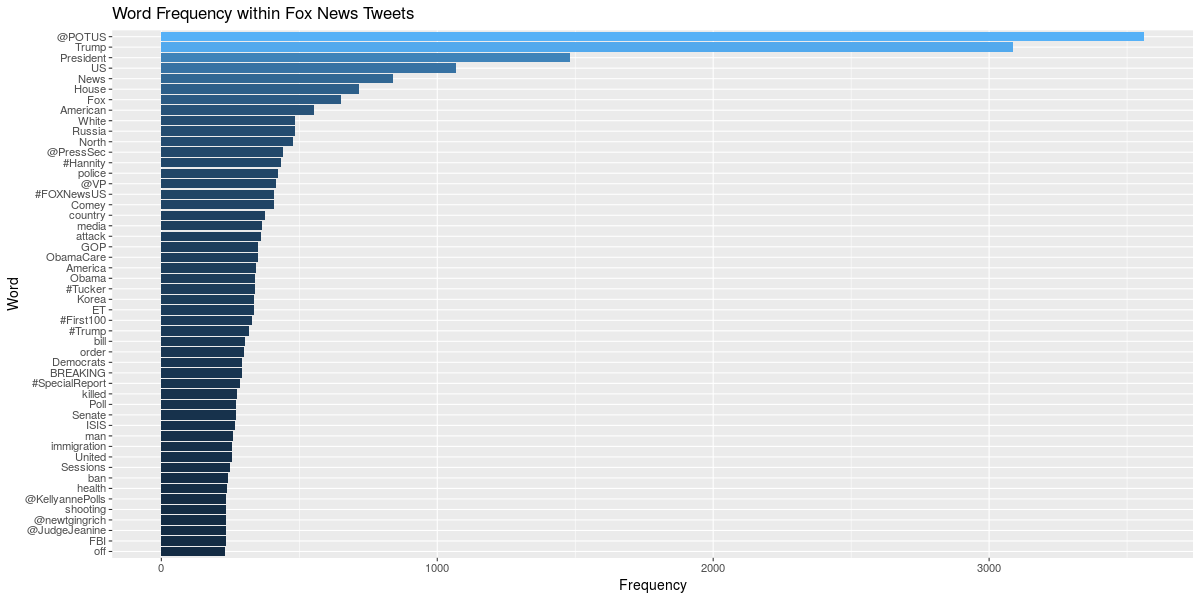

In [31]:
%%R -i fox_word_df -w 1200 -h 600

fox_word_df$word <- factor(fox_word_df$word, levels=fox_word_df$word[order(fox_word_df$occurrences)])
# fox_word_df

ggplot(fox_word_df, aes(x=word, y=occurrences, fill=log(occurrences))) + geom_bar(stat="identity") + coord_flip() +
    labs(x="Word", y="Frequency",title="Word Frequency within Fox News Tweets") + theme(legend.position="")